In [1]:
import pandas as pd 
import logging
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
import matplotlib.pyplot as plt
import numpy as np

logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

df = pd.read_csv("C:\\Users\\Eli\\Desktop\\news_dataset.csv", index_col=0)
df

,title,content,publication,label
0,Muslims BUSTED: They Stole Millions In Gov’t B...,Print They should pay all the back all the mon...,100percentfedup,fake
1,Re: Why Did Attorney General Loretta Lynch Ple...,Why Did Attorney General Loretta Lynch Plead T...,100percentfedup,fake
2,BREAKING: Weiner Cooperating With FBI On Hilla...,Red State : \nFox News Sunday reported this mo...,100percentfedup,fake
3,PIN DROP SPEECH BY FATHER OF DAUGHTER Kidnappe...,Email Kayla Mueller was a prisoner and torture...,100percentfedup,fake
4,FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Heal...,Email HEALTHCARE REFORM TO MAKE AMERICA GREAT ...,100percentfedup,fake
...,...,...,...,...
15707,An eavesdropping Uber driver saved his 16-year...,Uber driver Keith Avila picked up a p...,Washington Post,real
15708,Plane carrying six people returning from a Cav...,Crews on Friday continued to search L...,Washington Post,real
15709,After helping a fraction of homeowners expecte...,When the Obama administration announced a...,Washington Post,real
15710,"Yes, this is real: Michigan just banned bannin...",This story has been updated. A new law in...,Washington Post,real


In [2]:
len(df[df['label'].str.contains('fake')])

12999

In [3]:
len(df[df['label'].str.contains('real')])

15712

In [4]:
print(df['content'])

0        Print They should pay all the back all the mon...
1        Why Did Attorney General Loretta Lynch Plead T...
2        Red State : \nFox News Sunday reported this mo...
3        Email Kayla Mueller was a prisoner and torture...
4        Email HEALTHCARE REFORM TO MAKE AMERICA GREAT ...
                               ...                        
15707             Uber driver Keith Avila picked up a p...
15708             Crews on Friday continued to search L...
15709         When the Obama administration announced a...
15710         This story has been updated. A new law in...
15711         The nation’s first recreational marijuana...
Name: content, Length: 28711, dtype: object


In [5]:
#drop NaN values
df = df.dropna()
#reset index column after removing NaN values
df.reset_index(drop=True, inplace= True)
df

,title,content,publication,label
0,Muslims BUSTED: They Stole Millions In Gov’t B...,Print They should pay all the back all the mon...,100percentfedup,fake
1,Re: Why Did Attorney General Loretta Lynch Ple...,Why Did Attorney General Loretta Lynch Plead T...,100percentfedup,fake
2,BREAKING: Weiner Cooperating With FBI On Hilla...,Red State : \nFox News Sunday reported this mo...,100percentfedup,fake
3,PIN DROP SPEECH BY FATHER OF DAUGHTER Kidnappe...,Email Kayla Mueller was a prisoner and torture...,100percentfedup,fake
4,FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Heal...,Email HEALTHCARE REFORM TO MAKE AMERICA GREAT ...,100percentfedup,fake
...,...,...,...,...
27980,An eavesdropping Uber driver saved his 16-year...,Uber driver Keith Avila picked up a p...,Washington Post,real
27981,Plane carrying six people returning from a Cav...,Crews on Friday continued to search L...,Washington Post,real
27982,After helping a fraction of homeowners expecte...,When the Obama administration announced a...,Washington Post,real
27983,"Yes, this is real: Michigan just banned bannin...",This story has been updated. A new law in...,Washington Post,real


In [6]:
len(df[df['label'].str.contains('fake')])

12273

In [7]:
len(df[df['label'].str.contains('real')])

15712

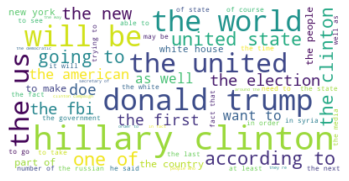

Top 60 Words in the articles labelled as 'Fake'


In [9]:
stopwords = set(STOPWORDS)
stopwords.add("wa")
stopwords.add("hi")
stopwords.add("ha")
text = " ".join(content for content in df['content'][:12273])
text = text.lower()
wordcloud = WordCloud(stopwords = stopwords,max_words=60, background_color="white").generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
print("Top 60 Words in the articles labelled as 'Fake'")
wordcloud.to_file("wordClouds/first_fake.png")

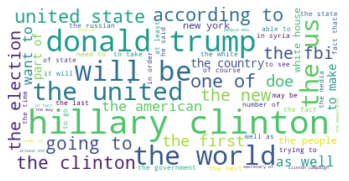

Top 60 Words in the articles labelled as 'Real'


In [10]:
text_real = " ".join(content for content in df['content'][12274:])
text_real = text.lower()
wordcloud = WordCloud(stopwords = stopwords,max_words=60, background_color="white").generate(text_real)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
print("Top 60 Words in the articles labelled as 'Real'")
wordcloud.to_file("wordClouds/first_real.png")

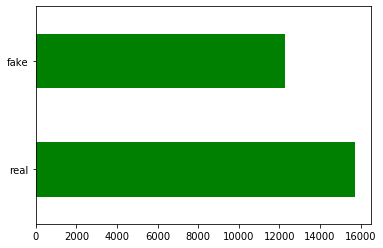

In [11]:
fig = df['label'].value_counts().plot(kind='barh', color="green")
fig.figure.savefig("barh.png")

In [12]:
df['content'][2]

'Red State : \nFox News Sunday reported this morning that Anthony Weiner is cooperating with the FBI, which has re-opened (yes, lefties: “re-opened”) the investigation into Hillary Clinton’s classified emails. Watch as Chris Wallace reports the breaking news during the panel segment near the end of the show: \nAnd the news is breaking while we’re on the air. Our colleague Bret Baier has just sent us an e-mail saying he has two sources who say that Anthony Weiner, who also had co-ownership of that laptop with his estranged wife Huma Abedin, is cooperating with the FBI investigation, had given them the laptop, so therefore they didn’t need a warrant to get in to see the contents of said laptop. Pretty interesting development. \nTargets of federal investigations will often cooperate, hoping that they will get consideration from a judge at sentencing. Given Weiner’s well-known penchant for lying, it’s hard to believe that a prosecutor would give Weiner a deal based on an agreement to testi

In [8]:
#text preprocessing imports
import nltk
import string

from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import word_tokenize

In [14]:
#Remove HTML data after the text was scraped 
def remove_html(text):
    soup = BeautifulSoup(text)
    html_free = soup.get_text()
    return html_free

In [15]:
#remove punctuation that we dont want to have tokenized
def remove_punctuation(text):
    no_punctuation = "".join([c for c in text if c not in string.punctuation])
    return no_punctuation

In [16]:
#tokenize each row using regex tokenizer, creating a list of words at every white space '\w' 
tokenizer = RegexpTokenizer(r'\w+')

In [17]:
#remove stopwords such as 'this' and 'in' as these would be the most common words when extracting features 
def remove_stopwords(text):
    words = [w for w in text if w not in stopwords.words('english')]
    return words

In [18]:
stemmer = PorterStemmer()

In [19]:
#normalize each word by removing the commoner morphological and inflexional endings
def word_stemmer(text):
    stem_text = " ".join([stemmer.stem(i) for i in text])
    return stem_text

In [20]:
#group all the functions into one function call that we can use on individual paragraphs later and to preprocess the dataset
def preprocess_text(x):
    x = remove_html(x)
    x = remove_punctuation(x)
    x = tokenizer.tokenize(x.lower())
    x = remove_stopwords(x)
    x = word_stemmer(x)
    return x

In [ ]:
#preprocess the entire 'content' column
logging.info('Preprocessing initiated...')
df['content'] = df['content'].apply(lambda x: preprocess_text(x))
logging.info('Preprocessing complete.')

In [21]:
df['content']

0        Print They should pay all the back all the mon...
1        Why Did Attorney General Loretta Lynch Plead T...
2        Red State : \nFox News Sunday reported this mo...
3        Email Kayla Mueller was a prisoner and torture...
4        Email HEALTHCARE REFORM TO MAKE AMERICA GREAT ...
                               ...                        
27980             Uber driver Keith Avila picked up a p...
27981             Crews on Friday continued to search L...
27982         When the Obama administration announced a...
27983         This story has been updated. A new law in...
27984         The nation’s first recreational marijuana...
Name: content, Length: 27985, dtype: object

In [ ]:
#save the processed dataset onto a new file for later use.
df.to_csv("C:\\Users\\Eli\\Desktop\\cleaned_dataset.csv")

In [9]:

df = pd.read_csv("C:\\Users\\Eli\\Desktop\\processed_news_dataset.csv", index_col=0)
df = df.dropna()
#reset index column after removing NaN values
df.reset_index(drop=True, inplace= True)
df

,title,content,publication,label
0,Muslims BUSTED: They Stole Millions In Gov’t B...,print pay back money plu interest entir famili...,100percentfedup,fake
1,Re: Why Did Attorney General Loretta Lynch Ple...,attorney gener loretta lynch plead fifth barra...,100percentfedup,fake
2,BREAKING: Weiner Cooperating With FBI On Hilla...,red state fox news sunday report morn anthoni ...,100percentfedup,fake
3,PIN DROP SPEECH BY FATHER OF DAUGHTER Kidnappe...,email kayla mueller prison tortur isi chanc re...,100percentfedup,fake
4,FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Heal...,email healthcar reform make america great sinc...,100percentfedup,fake
...,...,...,...,...
27870,An eavesdropping Uber driver saved his 16-year...,uber driver keith avila pick passeng look like...,Washington Post,real
27871,Plane carrying six people returning from a Cav...,crew friday continu search lake eri plane carr...,Washington Post,real
27872,After helping a fraction of homeowners expecte...,obama administr announc massiv effort help dis...,Washington Post,real
27873,"Yes, this is real: Michigan just banned bannin...",stori updat new law michigan prohibit local go...,Washington Post,real


In [10]:
df['content'][2]

'red state fox news sunday report morn anthoni weiner cooper fbi reopen ye lefti reopen investig hillari clinton classifi email watch chri wallac report break news panel segment near end show news break air colleagu bret baier sent us email say two sourc say anthoni weiner also coownership laptop estrang wife huma abedin cooper fbi investig given laptop therefor need warrant get see content said laptop pretti interest develop target feder investig often cooper hope get consider judg sentenc given weiner wellknown penchant lie hard believ prosecutor would give weiner deal base agreement testifi unless testimoni strongli corrobor hard evid cooper take mani form wallac indic morn show one form could sign consent form allow content devic could probabl get warrant anyway see weiner cooper extend beyond relat'

In [11]:
# machine learning imports
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
#from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score
from xgboost import XGBClassifier

2020-05-13 12:29:18,426 : INFO : Note: NumExpr detected 12 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
2020-05-13 12:29:18,426 : INFO : NumExpr defaulting to 8 threads.


In [12]:
# train/test split
training_data, testing_data = train_test_split(df, random_state = 42,)

# get labels from the 'label' column
y_train=training_data['label'].values
y_test=testing_data['label'].values
     

In [13]:
def collect_predictions(y_test, y_preds):
    """Collect all predictions and ground truth"""
    
    pred_gold_list=[ [ [y_test[idx] ], pred] for idx, pred in enumerate(y_preds)]
    return pred_gold_list

In [14]:
def compute_accuracy(eval_items:list):
    correct=0
    total=0
    
    for item in eval_items:
        true_vals=item[0]
        pred_vals=set(item[1])
        
        for label in true_vals:
            if label in pred_vals:
                correct+=1
                break

    accuracy=correct/float(len(eval_items))
    #print(correct, total)
    return accuracy

In [15]:
def extract_features(df, field, training_data, testing_data, type="binary"):
    """Extract features using different language models"""
    
    logging.info("Extracting features and vectorizing...")
    
    if "counts" in type:
        
        # count vectorizer (Bag-of-words language model)
        cv= CountVectorizer(binary=False, max_df=0.95, min_df=0.01)
        cv.fit_transform(training_data[field].values)
        # train/test split the dataset
        train_feature_set=cv.transform(training_data[field].values)
        test_feature_set=cv.transform(testing_data[field].values)
        
        return train_feature_set,test_feature_set,cv
    
    else:    
        
        # TF-IDF vectorizer
        tfidf_vectorizer=TfidfVectorizer(use_idf=True, max_df=0.95, min_df=0.01)
        tfidf_vectorizer.fit_transform(training_data[field].values)
        # train/test split the dataset
        train_feature_set=tfidf_vectorizer.transform(training_data[field].values)
        test_feature_set=tfidf_vectorizer.transform(testing_data[field].values)
        
        return train_feature_set,test_feature_set,tfidf_vectorizer


In [16]:
# testing the vectorization 
test_cv= CountVectorizer(binary=False, max_df=0.95, min_df=0.01)
test_cv.fit_transform(training_data['content'].values)

<20906x4048 sparse matrix of type '<class 'numpy.int64'>'
	with 4674155 stored elements in Compressed Sparse Row format>

In [17]:
top_n = 5
vectorizer = CountVectorizer(binary=False, max_df=0.95, min_df=0.01)
X = vectorizer.fit_transform(training_data['content'].values)
feature_array = vectorizer.get_feature_names()
print('Frequency: \n', sorted(list(zip(vectorizer.get_feature_names(), 
                                         X.sum(0).getA1())),
                            key=lambda x: x[1], reverse=True)[:top_n])


Frequency: 
 [('trump', 78817), ('said', 69793), ('one', 45089), ('peopl', 43388), ('would', 42699)]


In [18]:
vectorizertfidf = TfidfVectorizer(stop_words='english')
XV = vectorizertfidf.fit_transform(training_data['content'].values)
feature_array = vectorizertfidf.get_feature_names()
print('tf_idf scores: \n', sorted(list(zip(vectorizer.get_feature_names(), 
                                             XV.sum(0).getA1())), 
                                 key=lambda x: x[1], reverse=True)[:top_n])

tf_idf scores: 
 [('pursuit', 223.32843311473266), ('10', 108.24064678429666), ('band', 95.7133350401454), ('proxi', 83.03786877860527), ('photo', 77.27455286252369)]


In [20]:
print('idf values: \n', sorted(list(zip(feature_array,vectorizertfidf.idf_,)),
       key = lambda x: x[1], reverse=False)[:top_n])

idf values: 
 [('said', 1.4726761598247475), ('time', 1.5287789074819602), ('year', 1.5357016048358345), ('like', 1.5603574413780334), ('peopl', 1.5640499598400894)]


In [21]:
def get_label_prediction(model, X_test):
    
    # get probabilities
    probabilities = model.predict_proba(X_test)

    # get best fitting class label
    best_n = np.argsort(probabilities, axis=1)[:,-1:]
    
    # get label prediction
    predictions=[[model.classes_[predicted_class] for predicted_class in prediction] for prediction in best_n]
    # rebuild predictions using list comprehension 
    predictions=[ item[::-1] for item in predictions]
    
    return predictions

In [22]:
def train_model_lr(df, field="content", feature_rep="counts"):
    
    logging.info("Initiating...")
    

    # get features
    X_train, X_test, feature_transformer=extract_features(df, field, training_data, testing_data, type=feature_rep)
    # start linear regression
    logging.info("Fitting Logistical Regression Model...")
    lr = LogisticRegression(solver='saga', random_state=42, C=5, penalty='l2', max_iter=5000)
    model=lr.fit(X_train, y_train)

    # get prediction
    prediction=get_label_prediction(model, X_test)
    
    # store predicted values into a list of lists
    eval_items=collect_predictions(y_test, prediction)
    
    # collect all accuracies
    logging.info("Starting evaluation...")
    accuracy=compute_accuracy(eval_items)
    
    logging.info("Done training and evaluation.")
    
    return model, feature_transformer, accuracy

In [23]:
def train_model_nb(df, field, feature_rep):
    """Train a naive bayes model"""
    logging.info("Initiating...")
    
    # extract features 
    X_train, X_test, feature_transformer=extract_features(df, field, training_data, testing_data, type=feature_rep)

    # start naive bayes model
    logging.info("Fitting Naive Bayes Model...")
    nb = MultinomialNB()
    model_nb=nb.fit(X_train, y_train)
 
    # get prediction
    prediction=get_label_prediction(model_nb, X_test)
    
    # turn predicted items into a list
    eval_items=collect_predictions(y_test, prediction)
    
    # collect all accuracies
    logging.info("Starting evaluation...")
    accuracy=compute_accuracy(eval_items)
    
    logging.info("Done training and evaluation.")
    
    return model_nb, feature_transformer, accuracy


In [24]:
def train_model_xgb(df,field, feature_rep):
    """Train a XGBClassifier model"""
    logging.info("Initiating...")

    # extract features 
    X_train, X_test, feature_transformer=extract_features(df, field, training_data, testing_data, type=feature_rep)

    # start naive bayes model
    logging.info("Fitting XGBClassifier Model...")
    XGB = XGBClassifier()
    model_XGB=XGB.fit(X_train, y_train)

    # get prediction
    prediction=get_label_prediction(model_XGB, X_test)
    
    # turn predicted items and ground truths into a list
    eval_items=collect_predictions(y_test, prediction)
    
    # collect all accuracies
    logging.info("Starting evaluation...")
    accuracy=compute_accuracy(eval_items)
    
    logging.info("Done training and evaluation.")
    
    return model_XGB, feature_transformer, accuracy

In [57]:
def train_model_rf(df, field, feature_rep):
    """Train a Random Forest Classifier model"""
    logging.info("Initiating...")

    # extract features 
    X_train, X_test, feature_transformer=extract_features(df, field, training_data, testing_data, type=feature_rep)

    # start random forest model
    logging.info("Fitting Random Forest Model...")
    rfc = RandomForestClassifier(criterion = 'entropy', n_estimators=1000, random_state=42, max_depth=50, n_jobs=-1)
    model_rfc=rfc.fit(X_train, y_train)

    # get prediction
    prediction=get_label_prediction(model_rfc, X_test)
    
    # turn predicted items and ground truths into a list
    eval_items=collect_predictions(y_test, prediction)
    
    # collect all accuracies
    logging.info("Starting evaluation...")
    accuracy=compute_accuracy(eval_items)
    
    logging.info("Done training and evaluation.")
    
    return model_rfc, feature_transformer, accuracy

In [44]:
#Training Logistic regression model using tfidf vectorizer
model_tfidf_lr, transformer_tfidf_lr, accuracy_tfidf_lr=train_model_lr(df, 'content', 'tfidf')
print("\nAccuracy= {}".format(accuracy_tfidf_lr))

2020-05-12 16:55:21,748 : INFO : Initiating...
2020-05-12 16:55:21,749 : INFO : Extracting features and vectorizing...
2020-05-12 16:55:34,188 : INFO : Fitting Logistical Regression Model...
2020-05-12 16:55:35,389 : INFO : Starting evaluation...
2020-05-12 16:55:35,391 : INFO : Done training and evaluation.



Accuracy=0.9216530348687043


In [53]:
#Training Logistic regression model using counts vectorizer
model_counts_lr, transformer_counts_lr, accuracy_counts_lr=train_model_lr(df, 'content', 'counts')
print("\nAccuracy={}".format(accuracy_counts_lr))

2020-05-10 03:57:39,240 : INFO : Initiating...
2020-05-10 03:57:39,240 : INFO : Extracting features and vectorizing...
2020-05-10 03:57:51,447 : INFO : Fitting Logistical Regression Model...
2020-05-10 04:00:46,432 : INFO : Starting evaluation...
2020-05-10 04:00:46,434 : INFO : Done training and evaluation.



Accuracy=0.916630793514134


In [55]:
#Training Naive Bayes model using tfidf vectorizer
model_tfidf_nb, transformer_tfidf_nb, accuracy_tfidf_nb=train_model_nb(df, 'content', 'tfidf')
print("\nAccuracy={0}".format(accuracy_tfidf_nb))

2020-05-10 04:03:50,128 : INFO : Initiating...
2020-05-10 04:03:50,128 : INFO : Extracting features and vectorizing...
2020-05-10 04:04:02,652 : INFO : Fitting Naive Bayes Model...
2020-05-10 04:04:02,727 : INFO : Starting evaluation...
2020-05-10 04:04:02,729 : INFO : Done training and evaluation.



Accuracy=0.8388577988233606


In [56]:
#Training Naive Bayes model using counts vectorizer
model_counts_nb, transformer_counts_nb, accuracy_counts_nb=train_model_nb(df, 'content', 'counts')
print("\nAccuracy={0}".format(accuracy_counts_nb))

2020-05-10 04:04:02,739 : INFO : Initiating...
2020-05-10 04:04:02,739 : INFO : Extracting features and vectorizing...
2020-05-10 04:04:15,052 : INFO : Fitting Naive Bayes Model...
2020-05-10 04:04:15,112 : INFO : Starting evaluation...
2020-05-10 04:04:15,115 : INFO : Done training and evaluation.



Accuracy=0.8379968431625772


In [57]:
#Training XGB model using tfidf vectorizer
model_tfidf_XGB, transformer_tfidf_XGB, accuracy_tfidf_XGB=train_model_xgb(df, 'content', 'tfidf')
print("\nAccuracy={0}".format(accuracy_tfidf_XGB))

2020-05-10 04:04:15,125 : INFO : Initiating...
2020-05-10 04:04:15,125 : INFO : Extracting features and vectorizing...
2020-05-10 04:04:27,435 : INFO : Fitting XGBClassifier Model...
2020-05-10 04:04:44,939 : INFO : Starting evaluation...
2020-05-10 04:04:44,944 : INFO : Done training and evaluation.



Accuracy=0.9403070741856795


In [48]:
#Training XGB model using counts vectorizer
model_counts_XGB, transformer_counts_XGB, accuracy_counts_XGB=train_model_xgb(df, 'content', 'counts')
print("\nAccuracy={0}".format(accuracy_counts_XGB))

2020-05-12 18:12:27,037 : INFO : Initiating...
2020-05-12 18:12:27,038 : INFO : Extracting features and vectorizing...
2020-05-12 18:12:39,113 : INFO : Fitting XGBClassifier Model...
2020-05-12 18:12:47,170 : INFO : Starting evaluation...
2020-05-12 18:12:47,175 : INFO : Done training and evaluation.



Accuracy=0.9430334337781604


In [58]:
#Training rfc model using tfidf vectorizer
model_tfidf_rfc, transformer_tfidf_rfc, accuracy_tfidf_rfc=train_model_rf(df, 'content', 'tfidf')
print("\nAccuracy={0}".format(accuracy_tfidf_rfc))

2020-05-13 14:07:52,332 : INFO : Initiating...
2020-05-13 14:07:52,332 : INFO : Extracting features and vectorizing...
2020-05-13 14:08:04,871 : INFO : Fitting Random Forest Model...
2020-05-13 14:09:08,714 : INFO : Starting evaluation...
2020-05-13 14:09:08,716 : INFO : Done training and evaluation.



Accuracy=0.9025685177213374


In [59]:
#Training rfc model using counts vectorizer
model_counts_rfc, transformer_counts_rfc, accuracy_counts_rfc=train_model_rf(df, 'content', 'counts')
print("\nAccuracy={0}".format(accuracy_counts_rfc))

2020-05-13 14:09:08,976 : INFO : Initiating...
2020-05-13 14:09:08,976 : INFO : Extracting features and vectorizing...
2020-05-13 14:09:22,153 : INFO : Fitting Random Forest Model...
2020-05-13 14:10:23,127 : INFO : Starting evaluation...
2020-05-13 14:10:23,130 : INFO : Done training and evaluation.



Accuracy=0.8963983354857225


In [59]:

test_features=transformer_tfidf_lr.transform([preprocess_text('''Donald Trump said Monday that US officials expect the number of coronavirus cases in the United States to "spike" around Easter Sunday, a reversal from his talk of opening much of the country by 12 April.
A day after Speaker Nancy Pelosi called Mr Trump's early response to warnings the virus was headed to the United States "deadly," the president called the California Democrat a "sick puppy."

"She's got a lot of problems, in my opinion," he said without providing details of those alleged issues. "There's something wrong with the woman."

The president then slammed San Francisco, where Ms Pelosi lives, calling it a "slum" and saying the federal government might take control of the region to address its alleged problems.

Trump calls Pelosi a 'sick puppy' for attacking him
The president appeared in full campaign mode as he cannot hold his signature rallies, contending "Sleepy Joe wouldn't even know what was going on." That was a dig at former Vice President Joe Biden, the presumptive Democratic presidential nominee whom Mr Trump contends is mentally feeble.

The "Fox & Friends" co-hosts were in campaign mode, as well, asking Mr Trump about high approval ratings for New York Governor Andrew Cuomo over his handling of the virus outbreak there. The president responded that Mr Cuomo has only been able to respond to the outbreak in the manner he has because of federal help that he green-lit. He also said he would "love" to run against the New York governor in a presidential general election.

In yet another stunning moment of his term, Mr Trump appeared to claim the United States should have a more confrontational relationship with Germany and a closer one with Russia because the then-Soviet Union lost "50 million people" fighting on the side of the United States – against then-Nazi Germany. "No one talks about that," he said, leaving out the US-Soviet Cold War that followed that world war.

He told the conservative news network's morning show he would be speaking to Russian President Vladimir Putin following the "Fox & Friends" interview. Mr Trump has been criticised for at times appearing to carry out Mr Putin's whims, even though his administration has put sanctions on Russians over its 2016 election meddling.''')])
get_label_prediction(model_tfidf_lr,test_features)

[['real']]

In [60]:
test_features=transformer_counts_lr.transform([preprocess_text('''Writing in the Mail today, he warmed up by blasting Wonder Woman star Gal Gadot for her much-criticised, "tone deaf" version of Imagine that was supposed to lift people's spirits but left many cringing.

But he soon moved on to weightier targets, saying 47-year-old Idris had a place on his "idiot" list despite having contracted coronavirus himself - because he exposed the fact that A-listers were getting tested while NHS staff couldn't.

Piers later attacked High School Musical's Vanessa Hudgens, who called the virus a "bunch of bulls**t", saying she was in "urgent need of shutting the f*** up".

His ire then turned on singer Sam Smith, who earned a place on Piers' list thanks to a series of pictures they shared of a "meltdown" in self-isolation .''')])
get_label_prediction(model_counts_lr,test_features)

[['fake']]

In [61]:
import pickle
from sklearn.preprocessing import FunctionTransformer
model_path="C:\\Users\\Eli\\Documents\\GitHub\\fake-news-detection\\models\\model_tfidf_nb.pkl"
transformer_path="C:\\Users\\Eli\\Documents\\GitHub\\fake-news-detection\\models\\transformer_tfidf_nb.pkl"

# store both the transformer to encode a piece of text and the model itself to make predictions 
pickle.dump(model_tfidf_lr,open(model_path, 'wb'))
pickle.dump(transformer_tfidf_lr,open(transformer_path,'wb'))

In [62]:
# test that the model pickled successfully
loaded_model = pickle.load(open('C:\\Users\\Eli\\Documents\\GitHub\\fake-news-detection\\models\\model_tfidf_nb.pkl', 'rb'))
loaded_transformer = pickle.load(open('C:\\Users\\Eli\\Documents\\GitHub\\fake-news-detection\\models\\transformer_tfidf_nb.pkl', 'rb'))

test_features=loaded_transformer.transform(["President Trump AND THE impeachment story !!!"])
get_label_prediction(loaded_model,test_features)

[['real']]

In [63]:
print(loaded_model)

LogisticRegression(C=5, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=5000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)
